# London UK Airbnb EDA

- In this notebook I will be doing exploratory data analysis using python for the public dataset on Airbnb listings in London UK.
- This dataset is pubiclly available from the website [Inside Airbnb](http://insideairbnb.com/london).
- The main questions I will be trying to answer are:
    - How do listings vary in different areas of the city?
    - What sets apart the most popular hosts from less popular hosts?
    


# Importing Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import numpy as np
import folium

sns.set_palette("tab10")
sns.set_theme(style="whitegrid")

# Loading Data
I am reading the data from my local disk where I have downloaded it. Alternatively, this could be done by using the URL for the data's location.

In [2]:
filepath = os.getcwd() + "\\Downloads\\listings\\listings.csv"
df = pd.read_csv(filepath)
df.describe(include = "all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,69330,6.935100e+04,69346,0.0,69351,69351.000000,69351.000000,69351,69351.000000,69351.000000,69351.000000,52571,52571.000000,69351.000000,69351.000000,69351.000000,0.0
unique,NaN,67029,NaN,13043,NaN,33,NaN,NaN,4,NaN,NaN,NaN,2728,NaN,NaN,NaN,NaN,NaN
top,NaN,✿♫✯Very Nice Room Near Red Cross Garden Park✯♫✿,NaN,Alex,NaN,Westminster,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-09-04,NaN,NaN,NaN,NaN,NaN
freq,NaN,115,NaN,523,NaN,7763,NaN,NaN,41224,NaN,NaN,NaN,1215,NaN,NaN,NaN,NaN,NaN
mean,1.373703e+17,NaN,1.242124e+08,NaN,NaN,NaN,51.509544,-0.128489,NaN,177.208822,5.997505,17.537051,NaN,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,NaN,1.377104e+08,NaN,NaN,NaN,0.049182,0.100957,NaN,412.823024,25.709514,40.410763,NaN,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,NaN,4.775000e+03,NaN,NaN,NaN,51.272480,-0.523600,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,NaN,1.870718e+07,NaN,NaN,NaN,51.483140,-0.189520,NaN,55.000000,1.000000,1.000000,NaN,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,NaN,6.010350e+07,NaN,NaN,NaN,51.513600,-0.126200,NaN,100.000000,2.000000,4.000000,NaN,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,NaN,1.960405e+08,NaN,NaN,NaN,51.539710,-0.068550,NaN,180.000000,4.000000,16.000000,NaN,1.080000,4.000000,228.000000,5.000000,NaN


## Data Wrangling
From the above, we can see that the two columns `neighbourgood_group` and `license` are empty. Therefore, I will drop these two columns.

In [3]:
df = df.drop(["neighbourhood_group", "license"], axis = 1)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,"Lovely large room, Bethnal Green",264345,Susie,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0
1,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2


Check the datatypes for each of the columns.
- `last_review` should be stored as the `datetime` type.

In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [5]:
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

In [6]:
df.isna().sum()

id                                    0
name                                 21
host_id                               0
host_name                             5
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       16780
reviews_per_month                 16780
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

We can see that the columns in `["name", "host_name", "last_review", "reviews_per_month"]` all contain missing values.
- I will impute the missing values in `name` and `host_name` with blank strings.
- For `last_review`, I will impute this with the median value.
- For `reviews_per_month`, I will impute the missing values with 0.

In [7]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

df["last_review"] = pd.to_datetime(df["last_review"])
median_date = df["last_review"].quantile(0.5)
df["last_review"] = df["last_review"].fillna(median_date)

df["name"] = df["name"].fillna("")

df["host_name"] = df["host_name"].fillna("")

Now that the data has been transformed into a more usable format, I can begin to investigate the dataset to identify some key insights.

# Exploratory Data Analysis

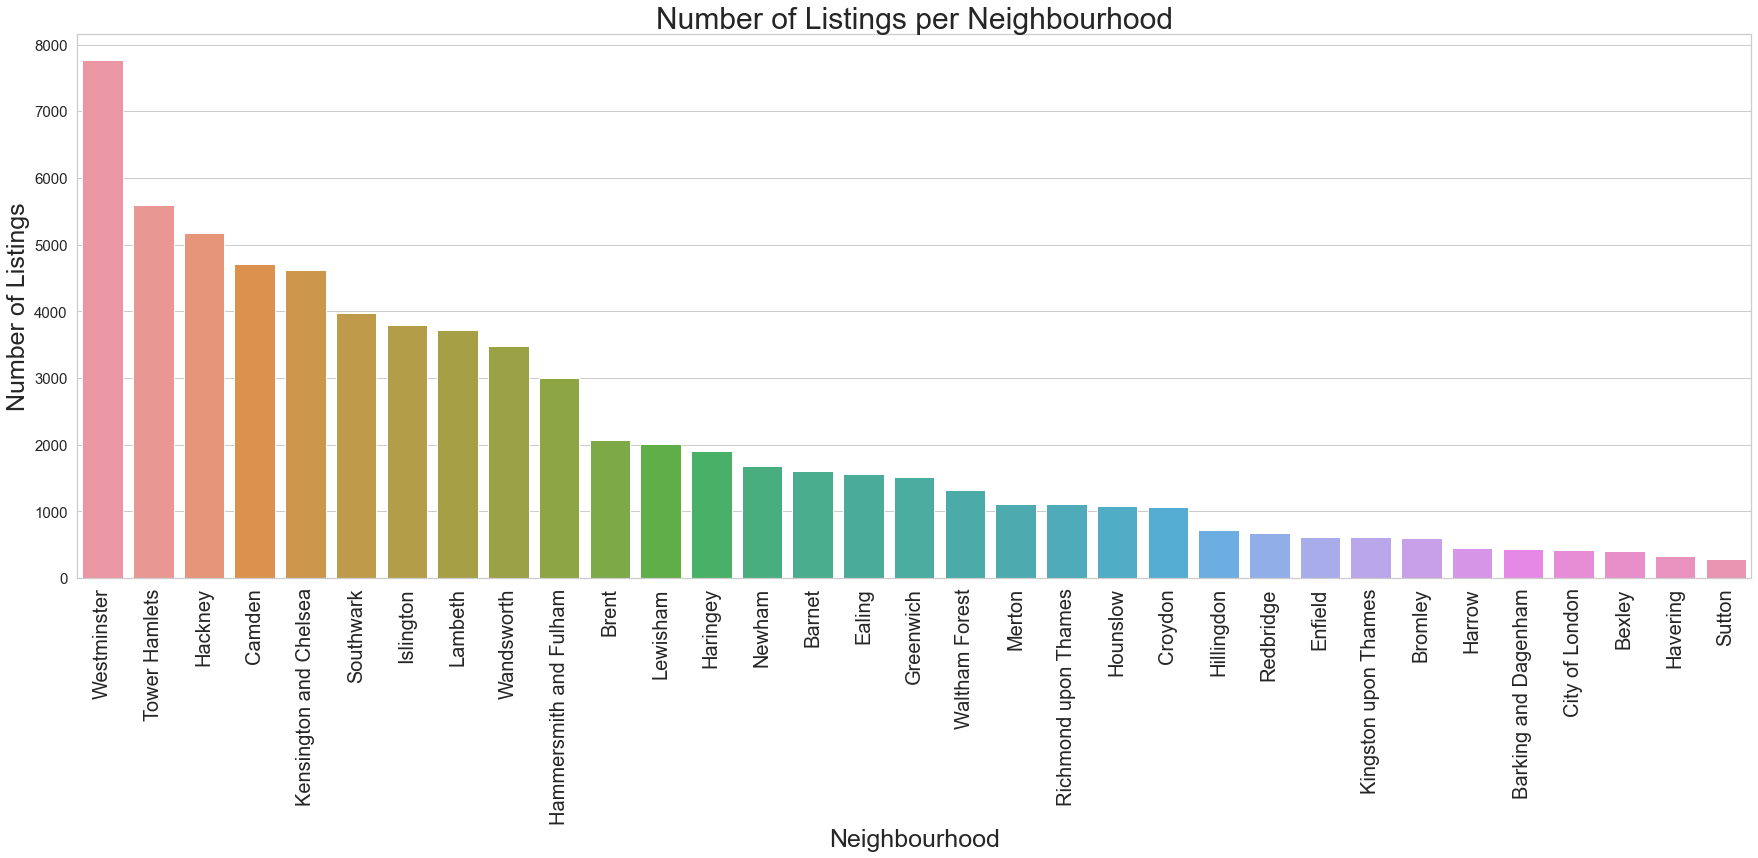

In [8]:
df_neighbourhood = df.neighbourhood.value_counts()
df_neighbourhood = df_neighbourhood.reset_index()
df_neighbourhood.columns = ["neighbourhood", "count"]

plt.figure(figsize = (30,10))
sns.barplot(data = df_neighbourhood, x = "neighbourhood", y = "count")
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel("Neighbourhood", fontsize = 25)
plt.ylabel("Number of Listings", fontsize = 25)
plt.title("Number of Listings per Neighbourhood", fontsize = 30)
plt.show()

We can see that Westminster has the most listings by a significant amount. The top 5 most popular areas being Westminster, Tower Hamlets, Hackney, Camden, Kensington and Chelsea, and Southwark.  

Below I will visualise the most popular areas geographically using the package `Folium`:

In [9]:
london_map = folium.Map(location = [51.509865, -0.118092], zoom_start = 11)
area_coords = df.groupby("neighbourhood")[["latitude", "longitude"]].mean()
area_coords["listings"] = df.neighbourhood.value_counts()

area_counts = folium.map.FeatureGroup()
for neighbourhood, lat, long, size in zip(area_coords.index, 
                                          area_coords.latitude, 
                                          area_coords.longitude, 
                                          area_coords.listings):
    area_counts.add_child(folium.features.CircleMarker([lat, long], 
                                                       radius = size / 250, 
                                                       fill = True, 
                                                       fill_opacity = 0.6, 
                                                       popup = "{}: {} Listings".format(neighbourhood, size)))

london_map.add_child(area_counts)
london_map

We can see that the areas with the most listings are located in Central London, which is what we would expect. 

Now, I would like to investigate what are the most common room types:

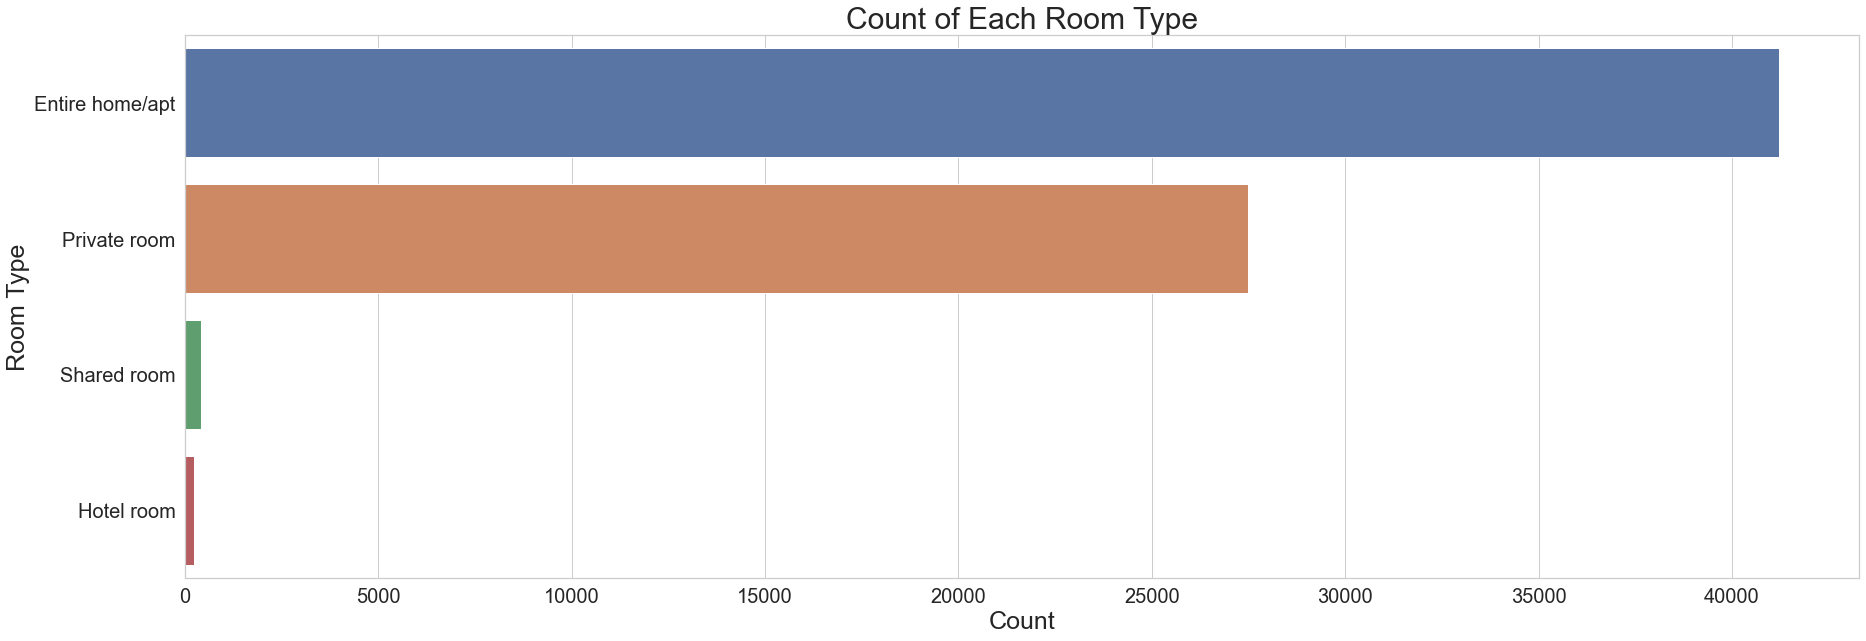

In [10]:
df_room = df.room_type.value_counts()
df_room = df_room.reset_index()
df_room.columns = ["room_type", "count"]

plt.figure(figsize = (30,10))
sns.barplot(data = df_room, x = "count", y = "room_type")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Count", fontsize = 25)
plt.ylabel("Room Type", fontsize = 25)
plt.title("Count of Each Room Type", fontsize = 30)
plt.show()

We can see that almost all of the listing comprise of either entire homes/apartments and private rooms. Only a very small number of listings are shared rooms or hotel rooms.

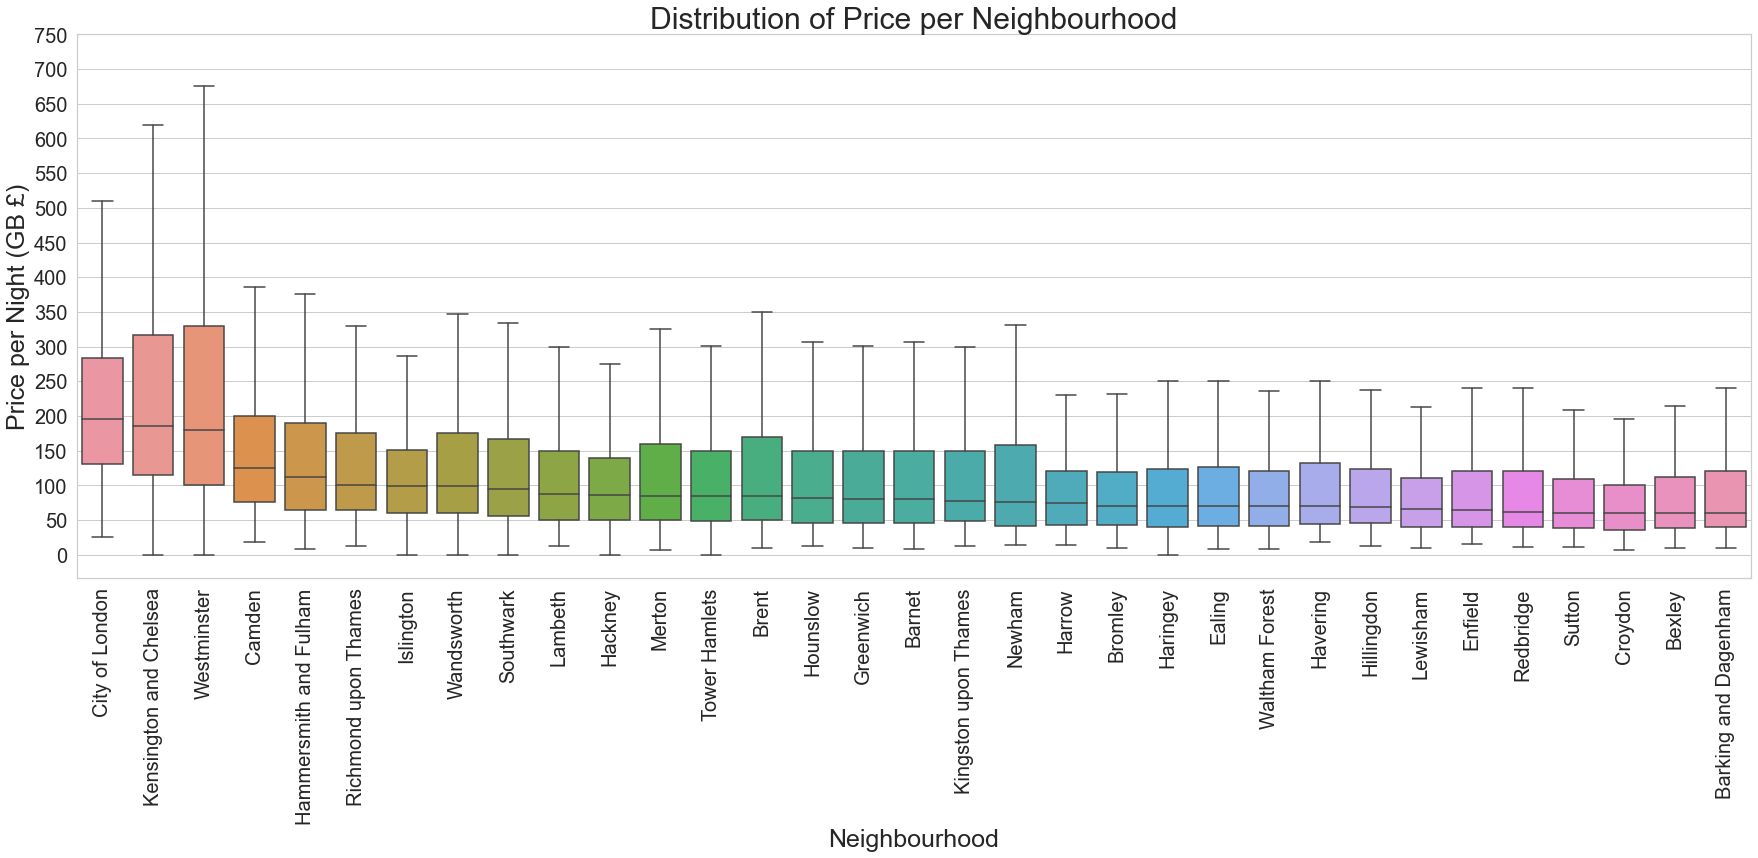

In [11]:
all_order = df.groupby("neighbourhood")["price"].median().sort_values(ascending = False).index

plt.figure(figsize = (30,10))
sns.boxplot(data = df, x = "neighbourhood", y = "price", showfliers = False, order = all_order)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(np.arange(0, 800, 50), fontsize = 20)
plt.xlabel("Neighbourhood", fontsize = 25)
plt.ylabel("Price per Night (GB £)", fontsize = 25)
plt.title("Distribution of Price per Neighbourhood", fontsize = 30)

plt.show()

From these boxplots, we can see that the three boroughs City of London, Kensington and Chelsea, and Westiminster have significantly higher prices on average when compared with the other boroughs which all have similar price distributions.  

Now that we have gained some insight into how listings vary by area, I would like to investigate what sets apart different Airbnb hosts from eachother:  

Firstly, I will categorise hosts by the number of listings they have with 3 categories:
- One listing
- Two to ten listings
- More than 10 listings

Text(0.5, 1.0, "Count of Listings Categorised by Number of Listings Hosted by the Listing's Host")

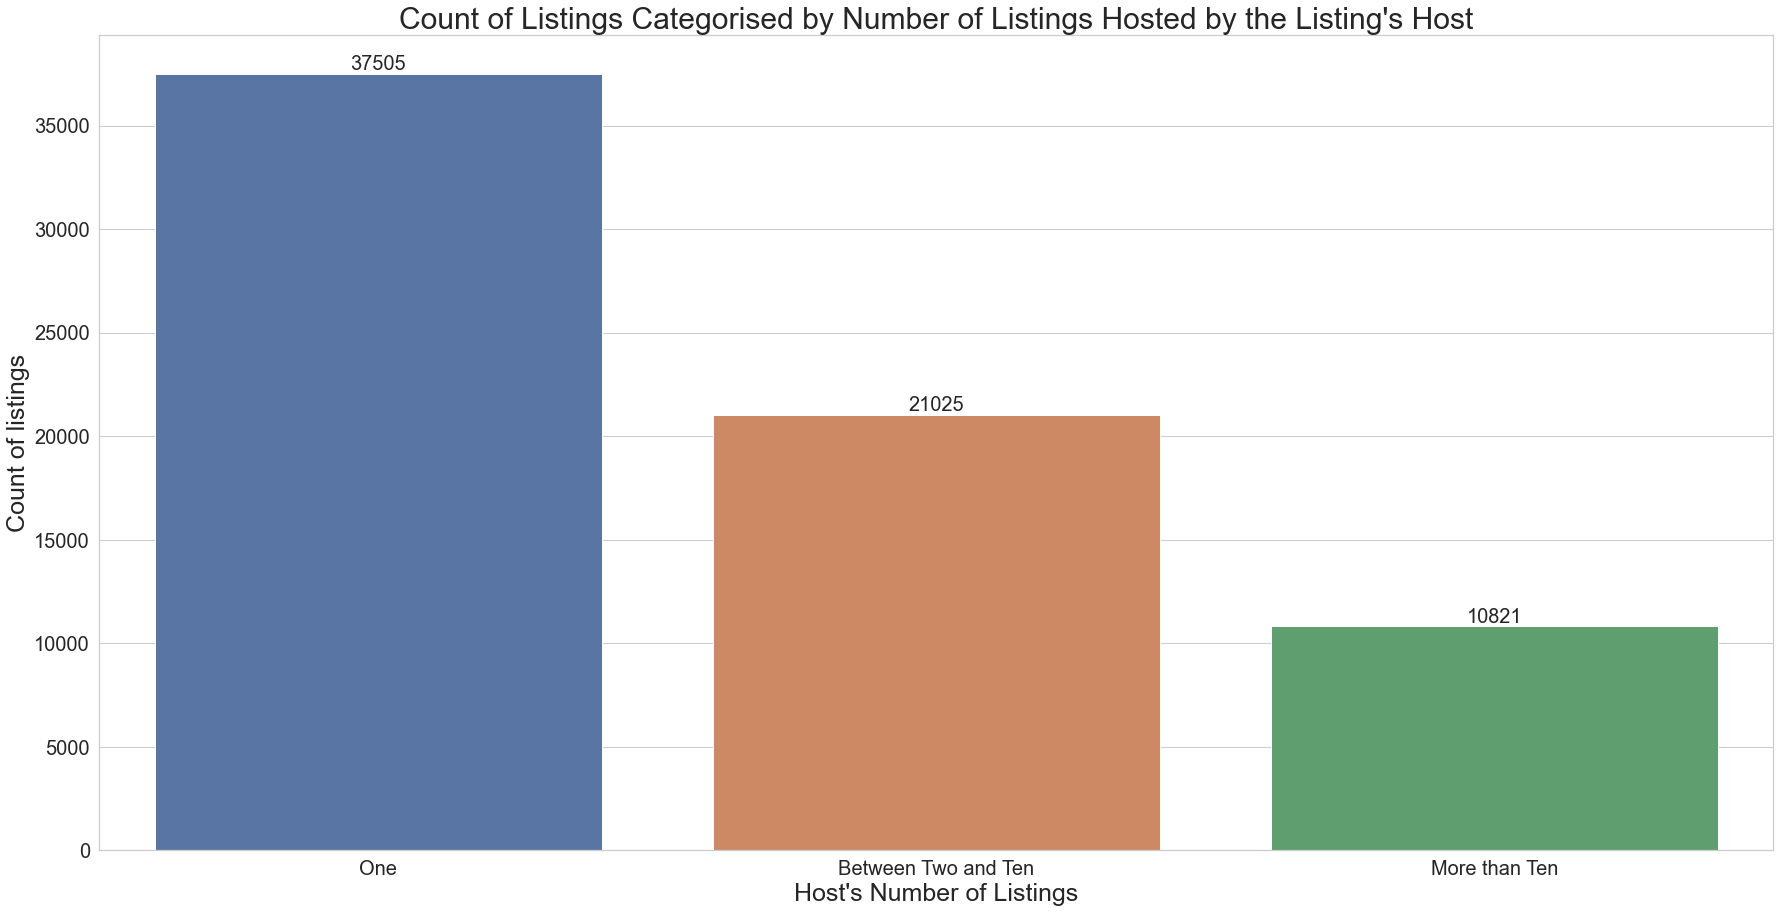

In [12]:
def helper(x):
    if x <= 1:
        return "One"
    elif x <=10:
        return "Between Two and Ten"
    else:
        return "More than Ten"

df["listings_count_cat"] = df.calculated_host_listings_count.apply(helper)

plt.figure(figsize = (30,15))
ax = sns.countplot(data = df, x = "listings_count_cat")
for i in ax.containers:
    ax.bar_label(i,fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Host's Number of Listings", fontsize = 25)
plt.ylabel("Count of listings", fontsize = 25)
plt.title("Count of Listings Categorised by Number of Listings Hosted by the Listing's Host", fontsize = 30)

In [13]:
percentage_one = 100 * ax.containers[0].datavalues[0] / sum(ax.containers[0].datavalues)
print("From this chart we can see that {:.1f}% of Airbnb London listings are hosted by hosts with only one listing. \n"
"indicating that non-professional hosts make up a signfication proportion of Airbnb listings.\nThe marketplace is not dominated by large hosts or professional companies.".format(percentage_one))


From this chart we can see that 54.1% of Airbnb London listings are hosted by hosts with only one listing. 
indicating that non-professional hosts make up a signfication proportion of Airbnb listings.
The marketplace is not dominated by large hosts or professional companies.


Now I would like to define a metric from the given dataset that we can use to rank the popularity of hosts. The metric I have chosen is the mean reviews per month of each host's listings. Hosts with a higher score will rank higher.

I would like to acknowledge that other choices of metric also calculated from reviews last month, last review date, availability, etc. could provide valuable insight. I have chosen this metric as it is easily interpretable as a real world quantity.

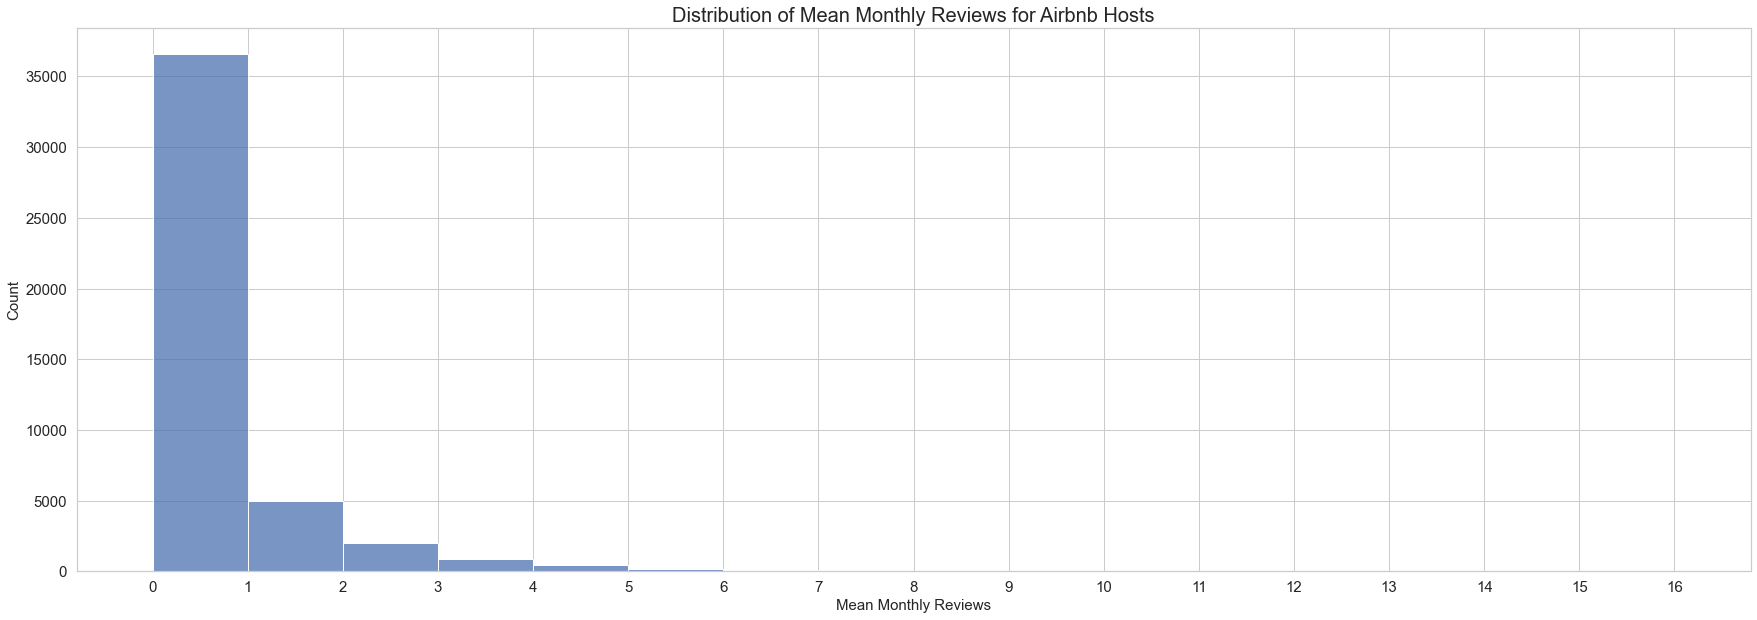

In [14]:
df_host_score = df.groupby("host_id")["reviews_per_month"].mean().reset_index()

plt.figure(figsize = (30,10))
sns.histplot(data = df_host_score, x = "reviews_per_month", 
             bins = np.arange(0, 1 + df_host_score["reviews_per_month"].max(), 1))
plt.xticks(np.arange(0, 17, 1), fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Mean Monthly Reviews", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Distribution of Mean Monthly Reviews for Airbnb Hosts", fontsize = 20)
plt.show()

Now that I have defined the host score metric and gained some understanding of its distribution, I will filter the original dataset to only include listings from the top 5% scoring hosts so that we can gain insight about how the most popular hosts differ from the rest. I will also filter the dataset to include only the bottom 95% of hosts.

In [15]:
top_5_hosts = df_host_score.loc[df_host_score.reviews_per_month >= df_host_score.reviews_per_month.quantile(0.95),: "host_id"]
top_5_hosts = top_5_hosts.host_id.to_list()
top_5_hosts
df_top = df[df.host_id.apply(lambda x: x in top_5_hosts)].copy()
df_bot = df[~df.host_id.apply(lambda x: x in top_5_hosts)].copy()
df_top.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,listings_count_cat
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,Between Two and Ten
6,107051,JESSIE the narrowboat in Little Venice,554519,Meg,Westminster,51.52055,-0.18317,Entire home/apt,204,2,581,2022-09-02,4.26,1,193,66,One
26,36660,You are GUARANTEED to love this,157884,Agri & Roger,Haringey,51.58478,-0.16057,Private room,72,2,575,2022-09-10,3.94,2,2,37,Between Two and Ten
54,42010,You Will Save Money Here,157884,Agri & Roger,Barnet,51.58590,-0.16434,Private room,60,4,527,2022-08-17,3.62,2,252,17,Between Two and Ten
59,304918,Luxury Studio in Clerkenwell,259088,Simon,Islington,51.52264,-0.10323,Private room,180,4,349,2022-08-30,2.75,5,249,13,Between Two and Ten


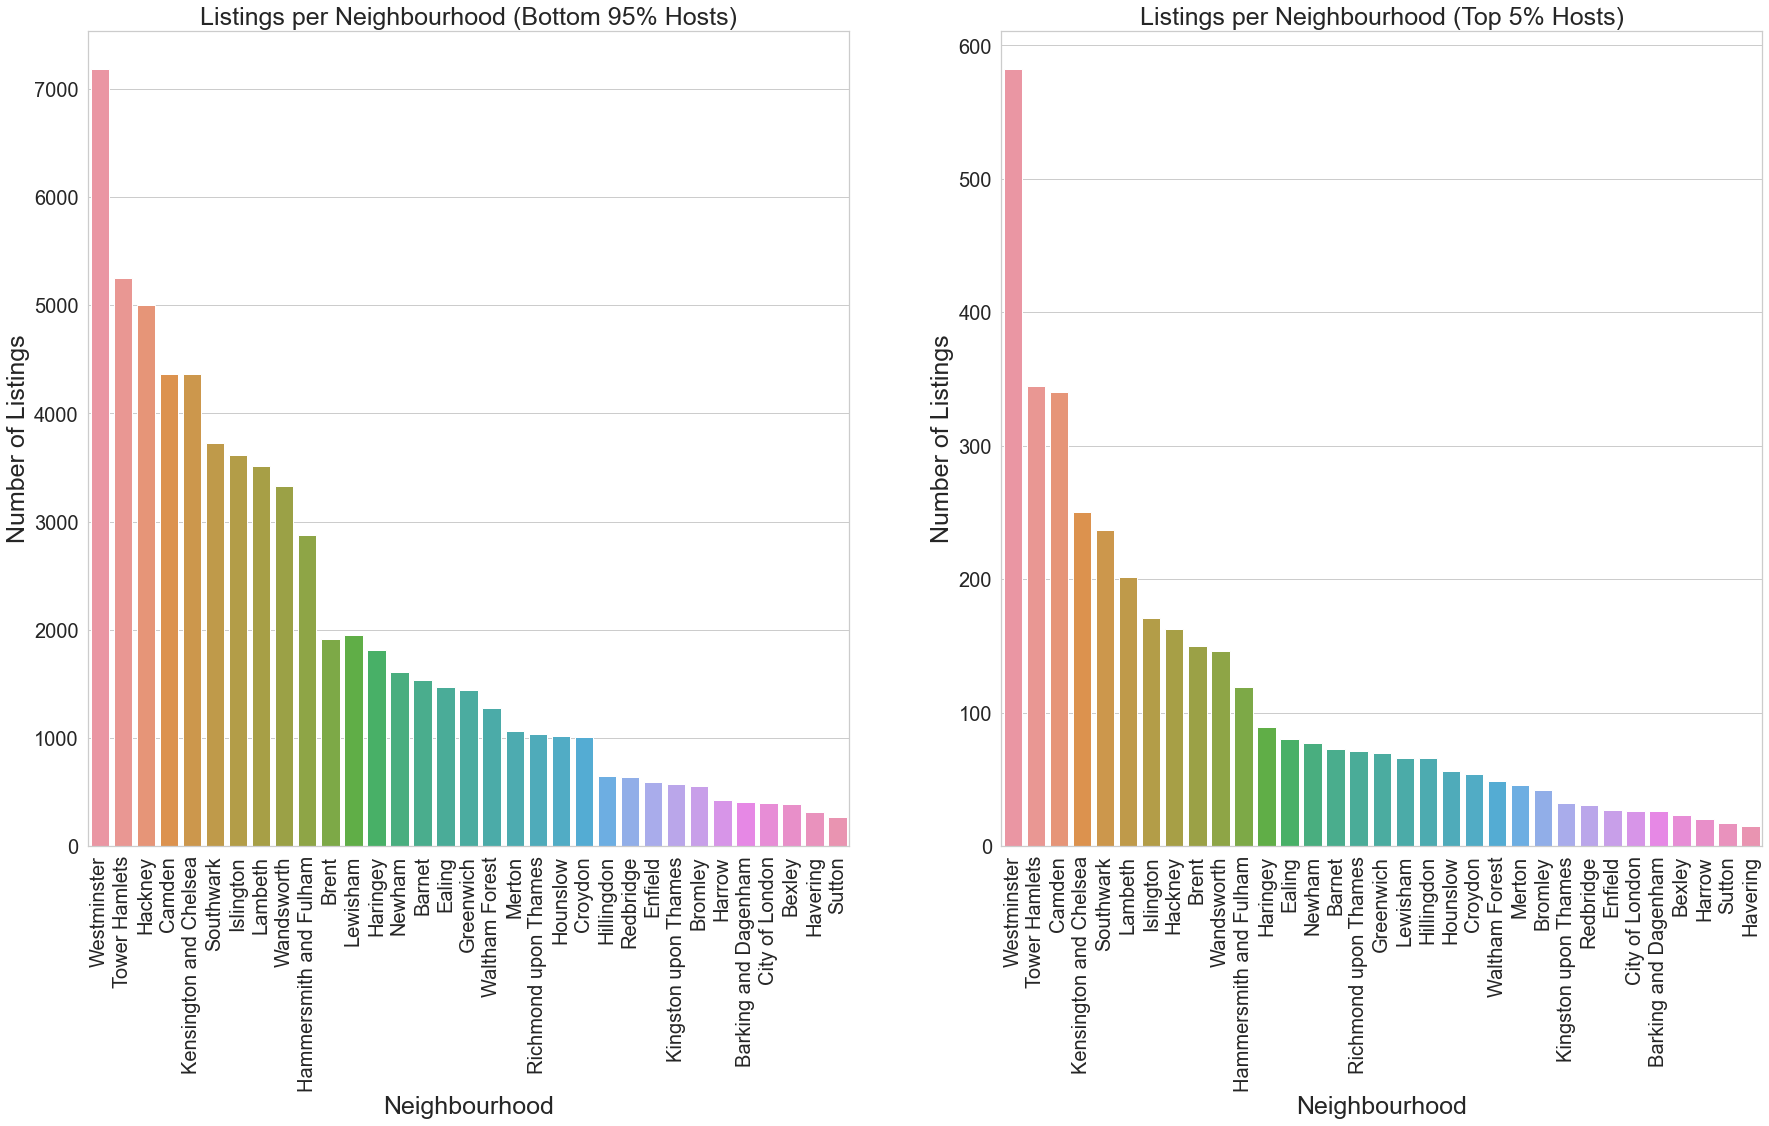

In [16]:
plt.figure(figsize = (30, 15))
plt.subplot(121)
sns.countplot(data = df_bot, x = "neighbourhood", order = df.neighbourhood.value_counts().index)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel("Neighbourhood", fontsize = 25)
plt.ylabel("Number of Listings", fontsize = 25)
plt.title("Listings per Neighbourhood (Bottom 95% Hosts)", fontsize = 25)


plt.subplot(122)
sns.countplot(data = df_top, x = "neighbourhood", order = df_top.neighbourhood.value_counts().index)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel("Neighbourhood", fontsize = 25)
plt.ylabel("Number of Listings", fontsize = 25)
plt.title("Listings per Neighbourhood (Top 5% Hosts)", fontsize = 25)

plt.show()

We can see that the most popular and least popular host's listings tend to be located in the same areas. One area that is less prevalent in the top 5% is Hackney. This could indicate that Hackney may be oversaturated with Airbnb listings.

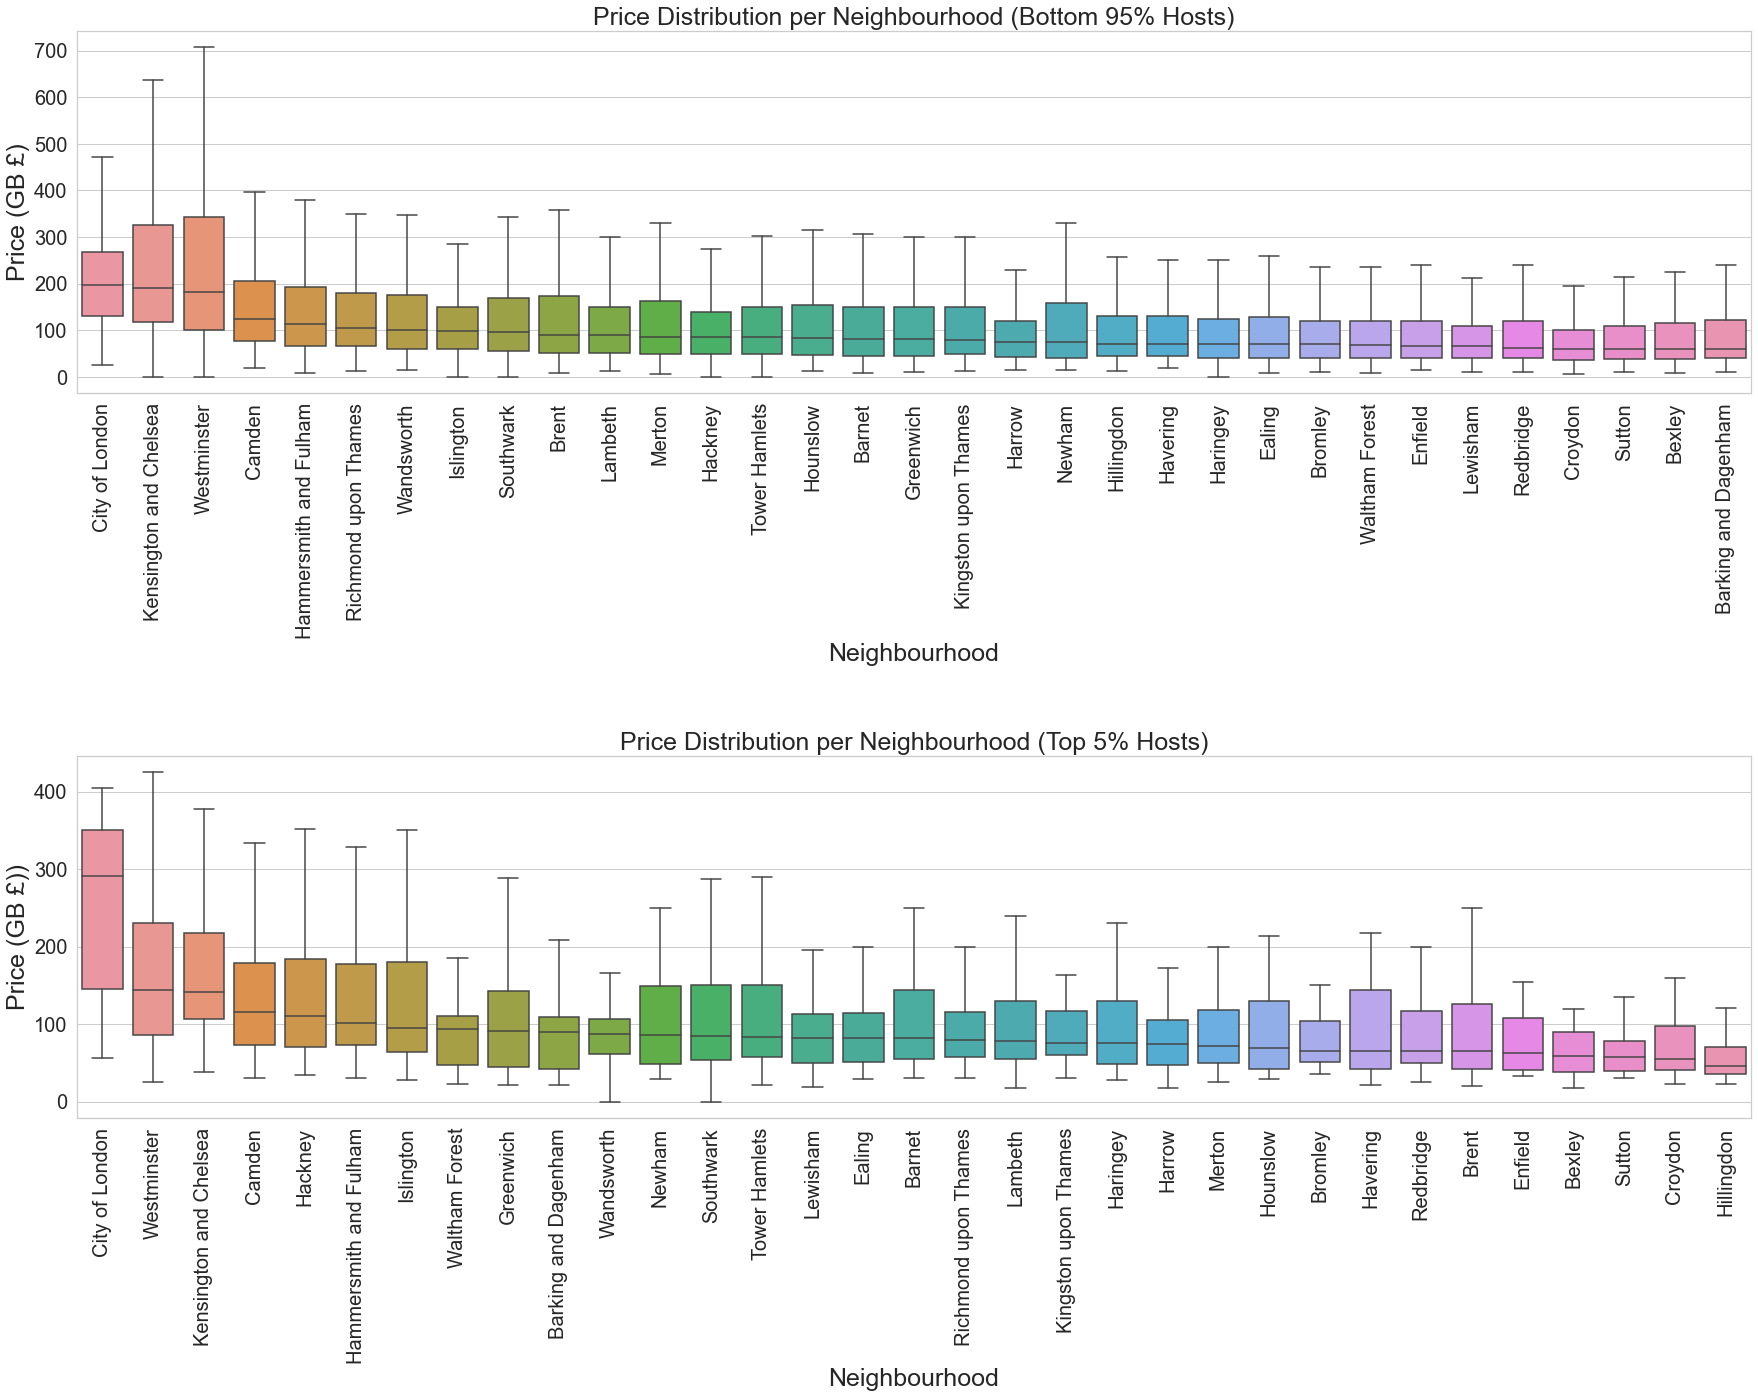

In [17]:
plt.figure(figsize = (30,20))
plt.subplot(211)
bot_order = df_bot.groupby("neighbourhood")["price"].median().sort_values(ascending = False).index
sns.boxplot(data = df_bot, x = "neighbourhood", y = "price", showfliers = False, order = bot_order)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel("Neighbourhood", fontsize = 25)
plt.ylabel("Price (GB £)", fontsize = 25)
plt.title("Price Distribution per Neighbourhood (Bottom 95% Hosts)", fontsize = 25)


plt.subplot(212)
top_order = df_top.groupby("neighbourhood")["price"].median().sort_values(ascending = False).index
sns.boxplot(data = df_top, x = "neighbourhood", y = "price", showfliers = False, order = top_order)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel("Neighbourhood", fontsize = 25)
plt.ylabel("Price (GB £))", fontsize = 25)
plt.title("Price Distribution per Neighbourhood (Top 5% Hosts)", fontsize = 25)

plt.subplots_adjust(hspace=1)
plt.show()

We can see that the most popular and least popular hosts have similar price distributions for their listings. This may indicate that price is not a driving factor for the popularity of a listings. However, the City of London has a notable high median price amongst popular hosts. This could indicate that luxury listings in the City of London are very popular.

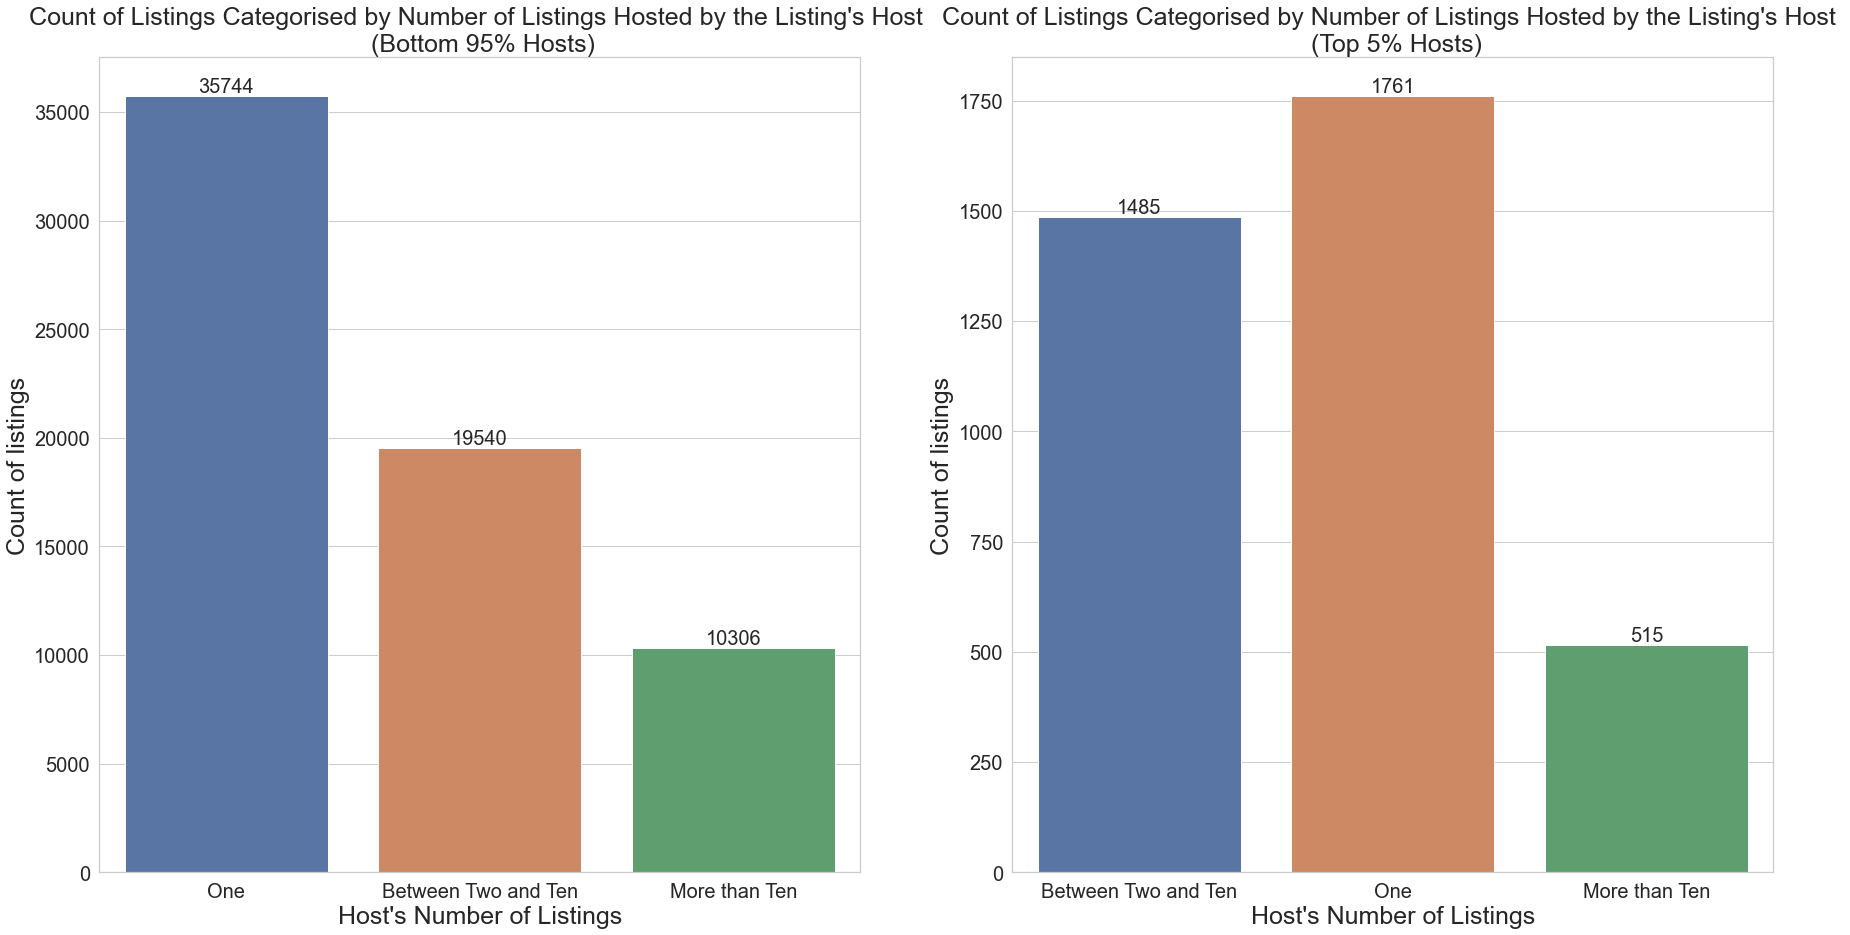

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (30,15))

plt.subplot(121)
ax = sns.countplot(data = df_bot, x = "listings_count_cat")
for i in ax.containers:
    ax.bar_label(i,fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Host's Number of Listings", fontsize = 25)
plt.ylabel("Count of listings", fontsize = 25)
plt.title("Count of Listings Categorised by Number of Listings Hosted by the Listing's Host \n (Bottom 95% Hosts)", fontsize = 25)

plt.subplot(122)
ax = sns.countplot(data = df_top, x = "listings_count_cat")
for i in ax.containers:
    ax.bar_label(i,fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Host's Number of Listings", fontsize = 25)
plt.ylabel("Count of listings", fontsize = 25)
plt.title("Count of Listings Categorised by Number of Listings Hosted by the Listing's Host \n (Top 5% Hosts)", fontsize = 25)

plt.show()

Both most popular and least popular hosts tend to be single  listing hosts, however there is a higher prevalence of medium sized (between two and ten) hosts in the top 5%.

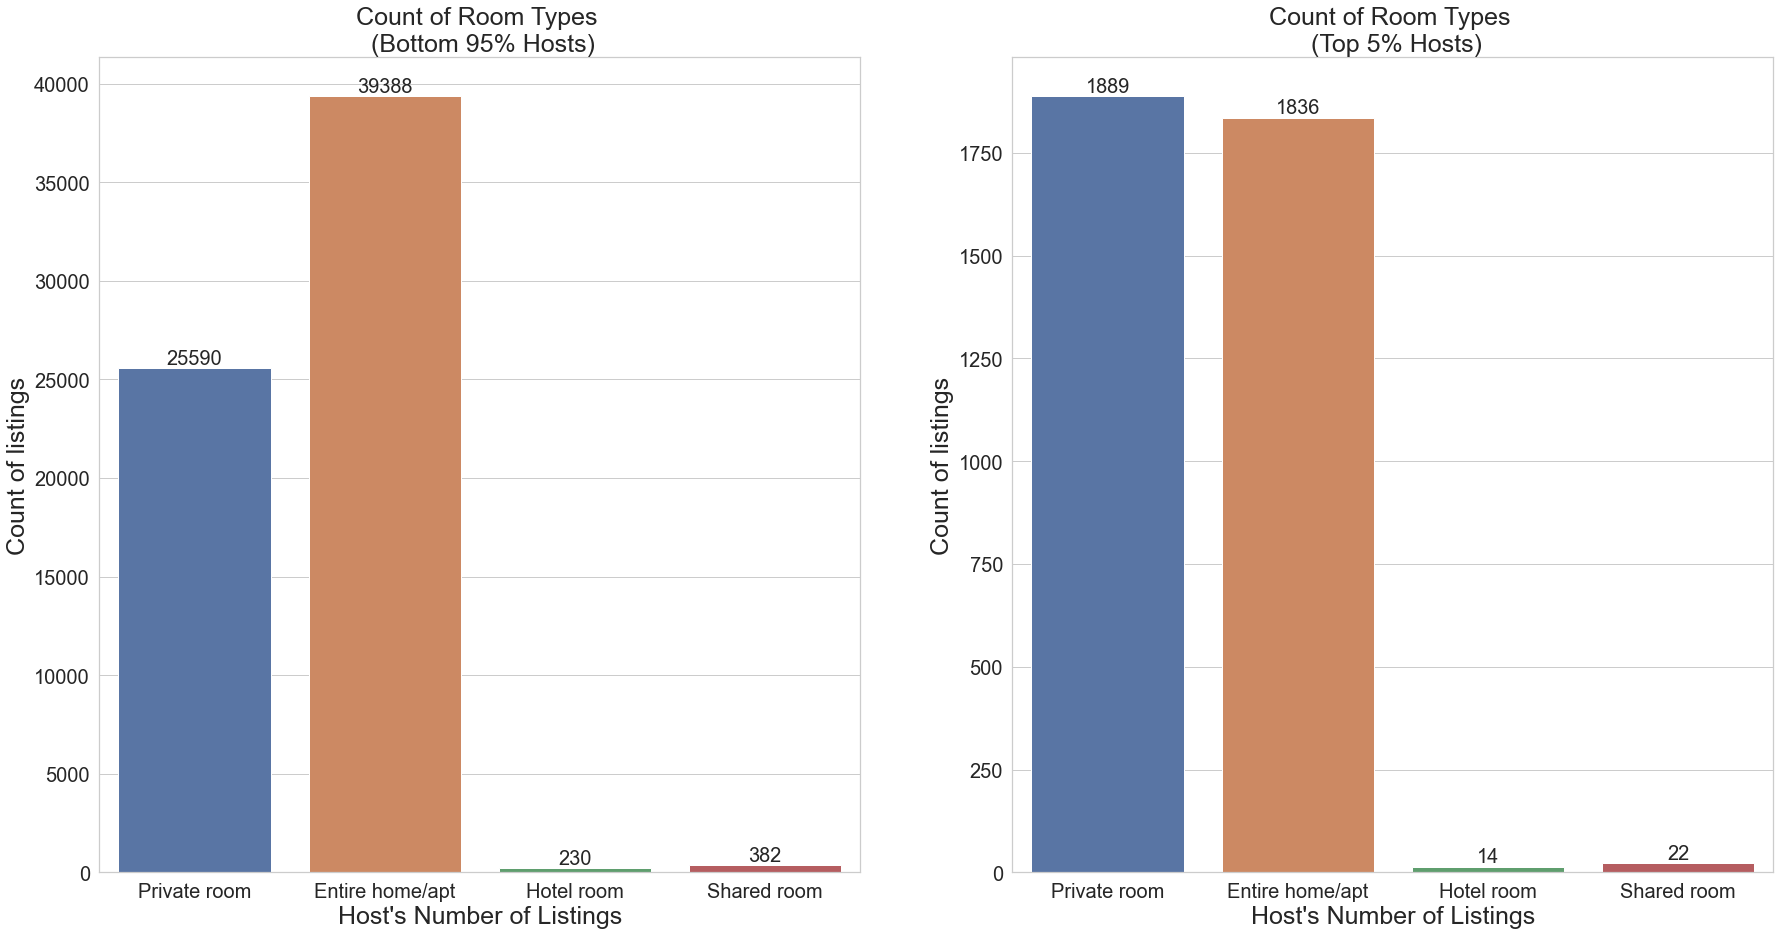

In [19]:
plt.figure(figsize = (30,15))
plt.subplot(121)
ax = sns.countplot(data = df_bot, x = "room_type")
for i in ax.containers:
    ax.bar_label(i,fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Host's Number of Listings", fontsize = 25)
plt.ylabel("Count of listings", fontsize = 25)
plt.title("Count of Room Types \n (Bottom 95% Hosts)", fontsize = 25)

plt.subplot(122)
ax = sns.countplot(data = df_top, x = "room_type")
for i in ax.containers:
    ax.bar_label(i,fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Host's Number of Listings", fontsize = 25)
plt.ylabel("Count of listings", fontsize = 25)
plt.title("Count of Room Types \n (Top 5% Hosts)", fontsize = 25)

plt.show()

This shows that there is a significant difference in the types of rooms offered by the the most popular and least popular hosts. More popular hosts are more likely to have private rooms, rather than entire homes or apartments.

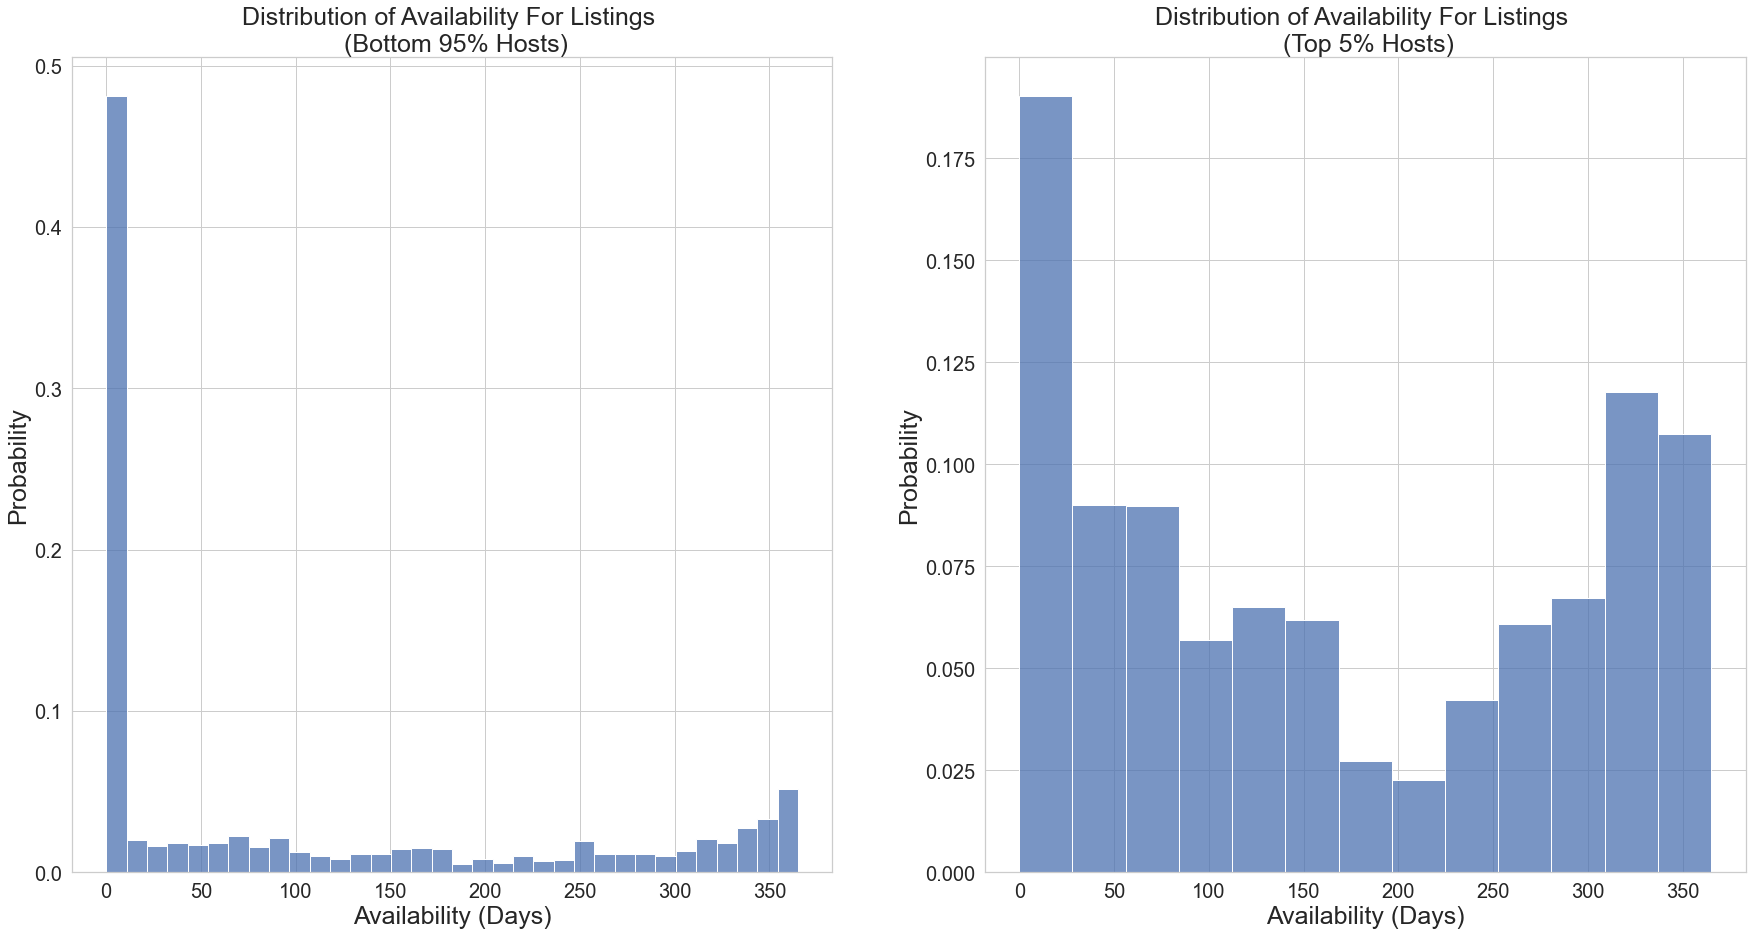

We can see that more popular hosts have much higher availability on average.
Most popular hosts have average availability 167 days.
Less popular hosts have average availability 105 days.



In [20]:
plt.figure(figsize = (30,15))
plt.subplot(121)
sns.histplot(data = df_bot, x = "availability_365", stat = "probability")

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Availability (Days)", fontsize = 25)
plt.ylabel("Probability", fontsize = 25)
plt.title("Distribution of Availability For Listings \n (Bottom 95% Hosts)", fontsize = 25)

plt.subplot(122)
sns.histplot(data = df_top, x = "availability_365", stat = "probability")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Availability (Days)", fontsize = 25)
plt.ylabel("Probability", fontsize = 25)
plt.title("Distribution of Availability For Listings \n (Top 5% Hosts)", fontsize = 25)

plt.show()

print("""We can see that more popular hosts have much higher availability on average.
Most popular hosts have average availability {:.0f} days.
Less popular hosts have average availability {:.0f} days.
""".format(df_top.availability_365.mean(), df_bot.availability_365.mean()))

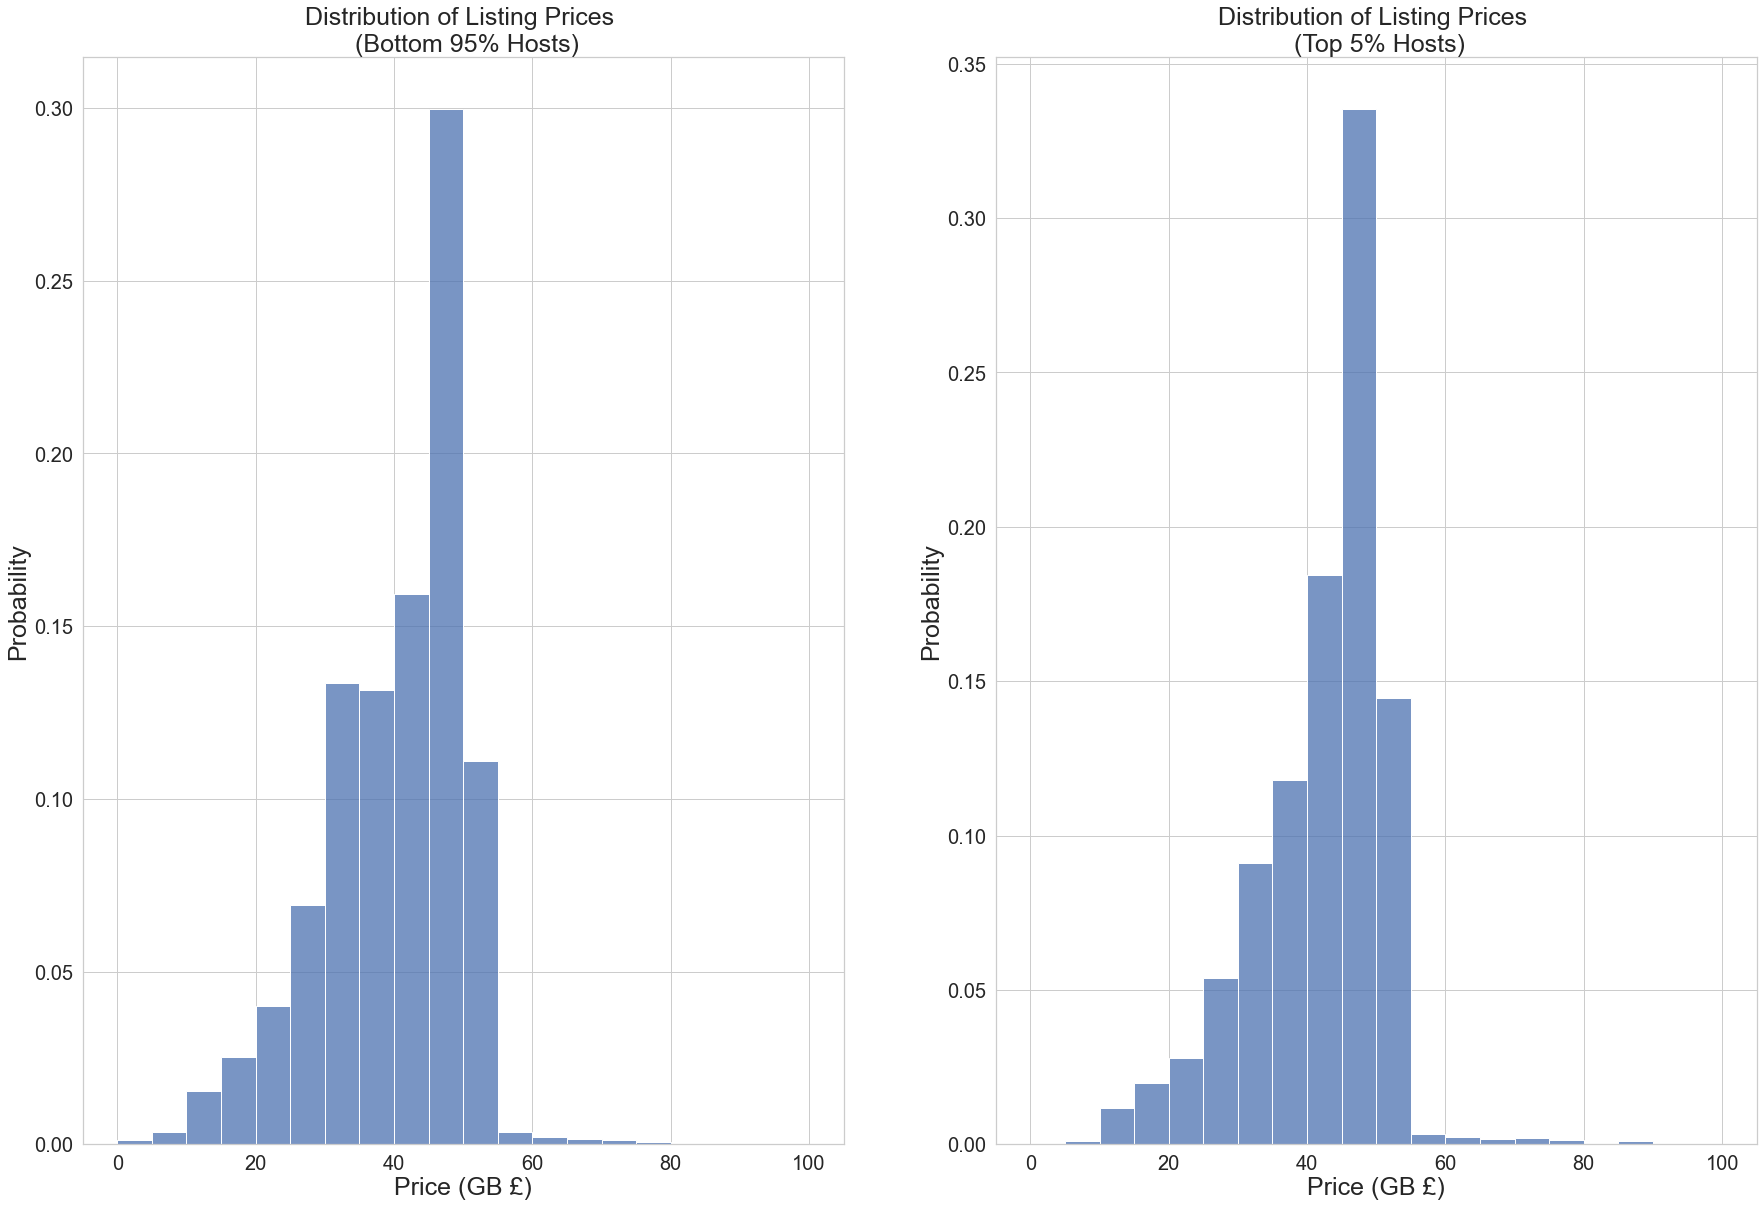

We can see that more popular hosts and less popular hosts have very similar price distribution.
However, more popular hosts have slightly lower median price:
Most popular hosts have median price £96 per night.
Less popular hosts have median price £100 per night.



In [30]:
plt.figure(figsize = (30,20))
plt.subplot(121)

sns.histplot(data = df.name.str.len(), stat = "probability", bins = np.arange(0, 101, 5))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Price (GB £)", fontsize = 25)
plt.ylabel("Probability", fontsize = 25)
plt.title("Distribution of Listing Prices \n (Bottom 95% Hosts)", fontsize = 25)

plt.subplot(122)
sns.histplot(data = df_top.name.str.len(), stat = "probability",bins = np.arange(0,101,5))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Price (GB £)", fontsize = 25)
plt.ylabel("Probability", fontsize = 25)
plt.title("Distribution of Listing Prices \n (Top 5% Hosts)", fontsize = 25)

plt.show()

print("""We can see that more popular hosts and less popular hosts have very similar price distribution.
However, more popular hosts have slightly lower median price:
Most popular hosts have median price £{:.0f} per night.
Less popular hosts have median price £{:.0f} per night.
""".format(df_top.price.median(), df_bot.price.median()))

In [38]:
top_name_length = df_top.name.str.len().mean()
bot_name_length = df_bot.name.str.len().mean()

print("""Lastly, I would like to compare how more popular and less popular hosts name their listings:
Top 5%: The average length of listing names is {:.1f} characters.
Bottom 95%: The average length of listing names is {:.1f} characters.
Therefore, more popular hosts have slightly longer listing names on average, which could help them attract more people.
""".format(top_name_length, bot_name_length))

Lastly, I would like to compare how more popular and less popular hosts name their listings:
Top 5%: The average length of listing names is 41.7 characters.
Bottom 95%: The average length of listing names is 39.6 characters.
Therefore, more popular hosts have slightly longer listing names on average, which could help them attract more people.



# Findings
To summarise some of the key insights I have found:
- Listings are concentrated in central London Boroughs.
- Listings in Westminster, Kensington and Chelsea, and City of London are particularly expensive.
- 54.1% of Airbnb listings in London are hosted by hosts with only one listing.
- Hosts in the top 5% popularity are more likely to be medium sized (between 2 and 10 listings).
- Hosts in the top 5% popularity are more likely to list private rooms than entire houses.
- Hosts in the top 5% popularity have much higher availability than other hosts: 167 days vs 105 days on average.